<a href="https://colab.research.google.com/github/zuckeer/imersao-dados-desafio-final/blob/main/ProjetoFinal_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de resultados fornecidos

In [17]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
# ajuste do nome da serie para facilitar a analise
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nessa base recebemos os resultados da avaliação para o Mecanismo de Ação(MoA) do composto aplicado.  
  
Esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada além de identificar se a o resultado do experimento se classifica como "agonista" ou "antiagonista", que ativam o receptor e o bloqueiam, respectivamente.


In [18]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa


nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [19]:
# Criacao das colunas n_moa com a soma dos e ativo_moa para identificar se ocorre a ativacao pelo farmaco
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

In [20]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()



,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [21]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

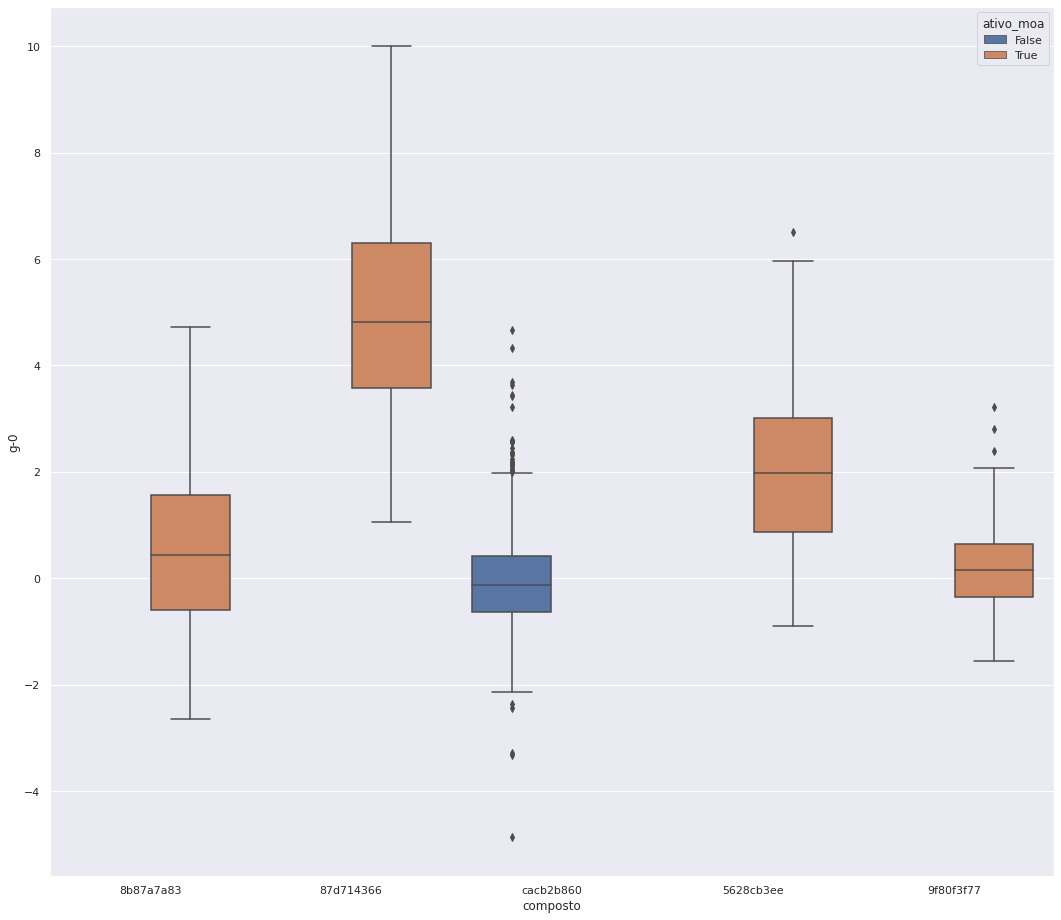

In [23]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(18,16))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g-0', x='composto', hue='ativo_moa')


In [24]:
contagem_moa = dados_resultados.drop(['id', 'n_moa', 'ativo_moa'], axis=1).sum().sort_values(ascending=False)
contagem_moa = contagem_moa.reset_index()
contagem_moa.rename(columns={'index':'MOAs',0: 'Contagem'}, inplace=True)

In [25]:
contagem_moa['sufixos'] = contagem_moa['MOAs'].apply(lambda x: x.split('_')[-1])
contagem_moa

,MOAs,Contagem,sufixos
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist
...,...,...,...
201,protein_phosphatase_inhibitor,6,inhibitor
202,autotaxin_inhibitor,6,inhibitor
203,diuretic,6,diuretic
204,erbb2_inhibitor,1,inhibitor


In [26]:
contagem_MOAs_ativos_por_sufixos = contagem_moa.groupby('sufixos').sum()['Contagem'].sort_values(ascending=False)


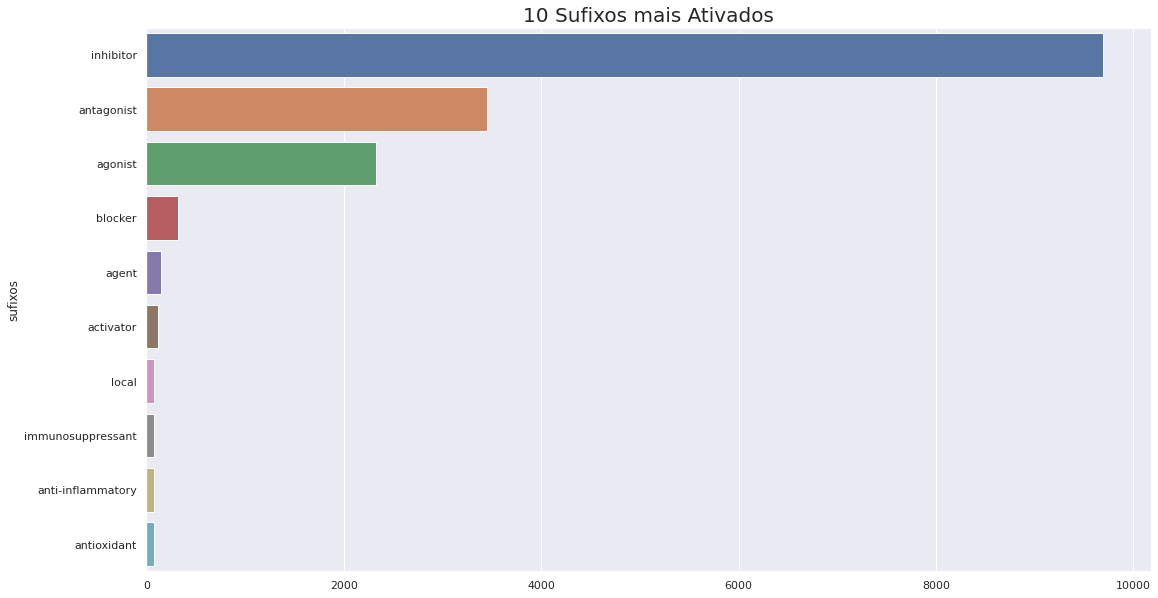

In [29]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
sns.barplot(y=contagem_MOAs_ativos_por_sufixos.head(10).index,
            x=contagem_MOAs_ativos_por_sufixos.head(10).values, ax=ax, orient='h')
ax.set_title("10 Sufixos mais Ativados", fontsize=20)
plt.show()


In [30]:
composto_principal = dados_combinados['composto'].value_counts().index[0:2]
composto_principal


Index(['cacb2b860', '87d714366'], dtype='object')

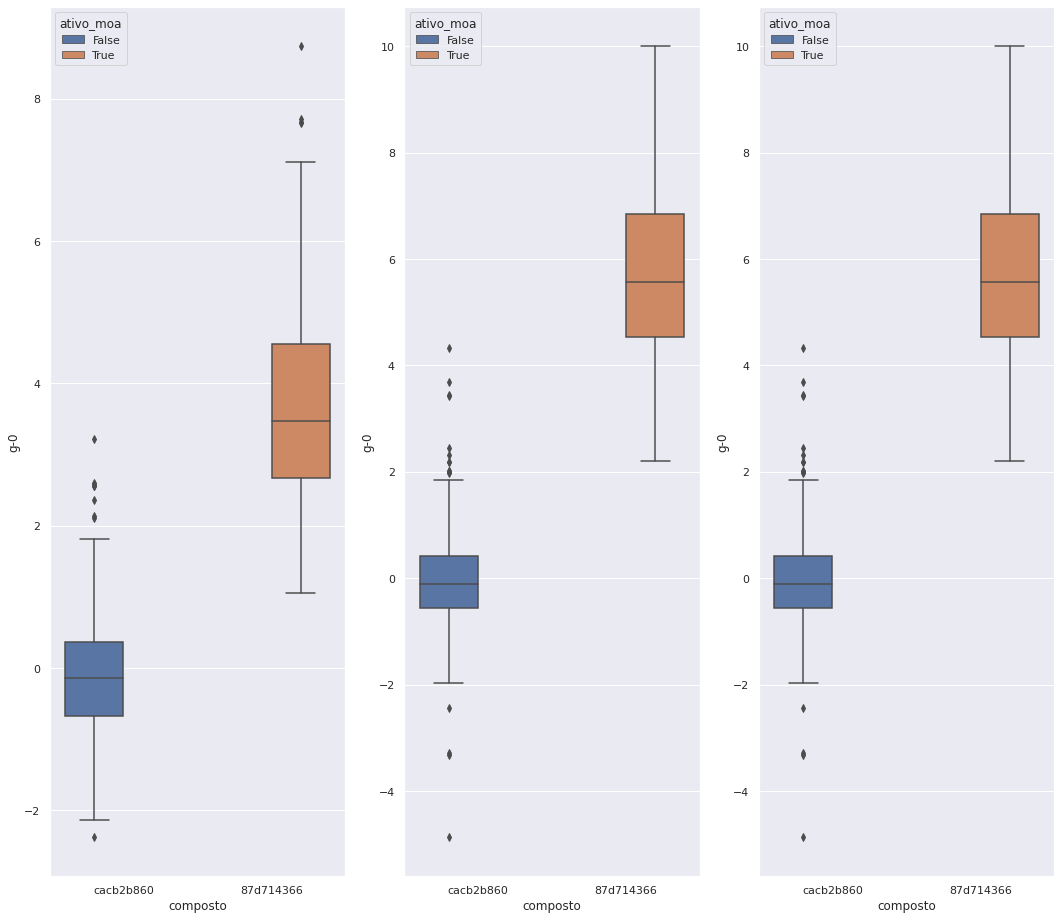

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,16))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 24'), y= 'g-0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g-0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax2)
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g-0', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax3)
plt.show()

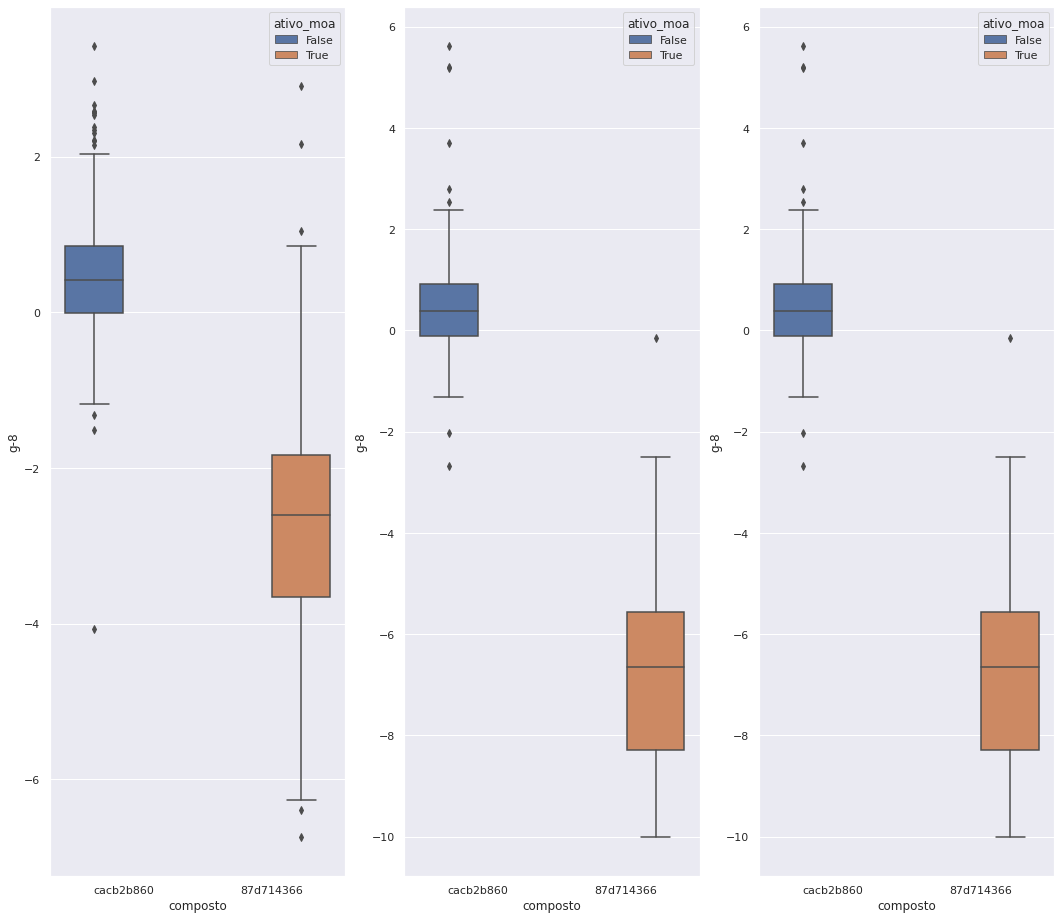

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,16))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 24'), y= 'g-8', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g-8', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax2)
sns.boxplot(data = dados_combinados.query('composto in @composto_principal & tempo == 48'), y= 'g-8', x='composto',
            hue='ativo_moa', order=composto_principal, ax=ax3)
plt.show()

# Usando ML
  
Avaliação da viabilidade celular.

In [33]:
from sklearn.model_selection import train_test_split
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

Usando regressão logística para prever a ativação do mecanisno de ação (MoA)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# dados de entrada
x = dados_combinados.select_dtypes('float64')
# dados de saida
y = dados_combinados['ativo_moa']
# separando o volume de dados a serem utilizados para treino e para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
modelo_rlogistica = LogisticRegression(max_iter=1000)
# treinando o modelo escolhido
modelo_rlogistica.fit(x_treino, y_treino)
# avaliando o resultado do modelo
modelo_rlogistica.score(x_teste, y_teste)

0.6264959059416334

Para os dados de treino fornecidos, o modelo apresentou uma taxa de acerto de **62,6%**


Usando uma modelo para comparar o resultado obtido com um DummyClassifier

In [51]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
modelo_dummy = DummyClassifier('most_frequent')
# treinando o modelo
modelo_dummy.fit(x_treino, y_treino)
# avaliando o resultado
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)


0.6067604450976275

A seguir vemos o percentual existente no conjunto de dados


In [36]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

Usando árvore de decisão

In [37]:
from sklearn.tree import DecisionTreeClassifier
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

Usando árvore até 3 passos

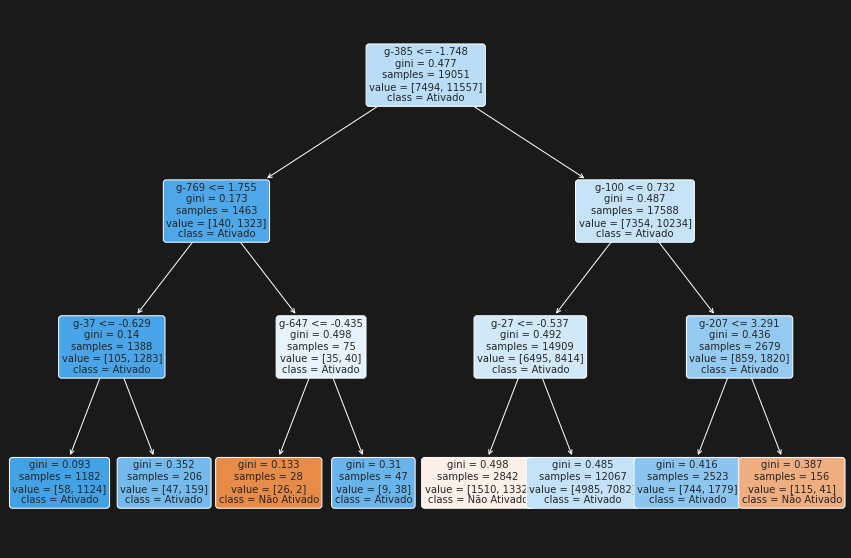

In [38]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show()

Usando árvore de decisão até 4 passos

In [46]:
from sklearn.tree import DecisionTreeClassifier
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
teste=[]
treino=[]
modelo_arvore = DecisionTreeClassifier(max_depth = 4)
for i in range(1,5):
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

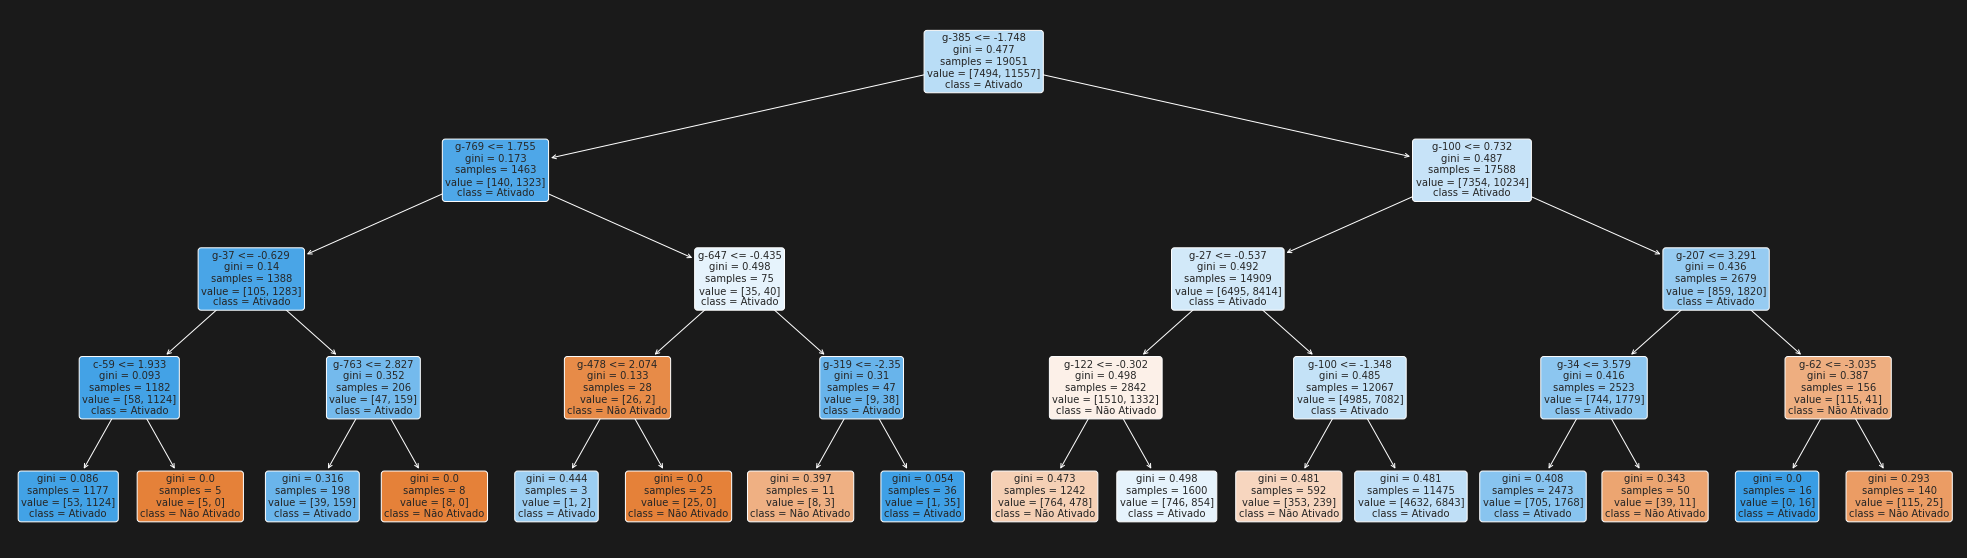

In [49]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(35, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show()


In [41]:
from sklearn.tree import DecisionTreeClassifier
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)
teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

## Avaliação do modelo demonstrando overfiting


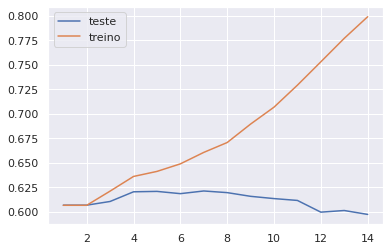

In [43]:
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')


## Conclusão
  
Comparando com o controle nas diferentes dosagens, não identificamos ativação após o período de 72 horas, a análise dos dados não demonstra ativação MoA.
